# Layouts

There are multiple ways to define a visualization layout in Matplotlib. By layout, we mean the arrangement of multiple Axes within a Figure. We will start with subplots and how to use the tight layout to create visually appealing plots and then cover GridSpec, which offers a more flexible way to create multi-plots.

## Subplots

It is often useful to display several plots next to one another. Matplotlib offers the concept of *subplots*, which are multiple Axes within a Figure. These plots can be grids of plots, nested plots, and so on.

Explore the following options to create subplots:

- The `plt.subplots(, ncols)` function creates a Figure and a set of subplots. `nrows, ncols` define the number of rows and columns of the subplots, respectively.
- The `plt.subplot(nrows, ncols, index)` function or, equivalently, `plt.subplot(pos)` adds a subplot to the current Figure. The index starts at 1. The plt.subplot(2, 2, 1) function is equivalent to plt.subplot(221).

Subplots are an easy way to create a Figure with multiple plots of the same size placed in a grid. They are not really suited for more sophisticated layouts.

<class 'numpy.ndarray'>


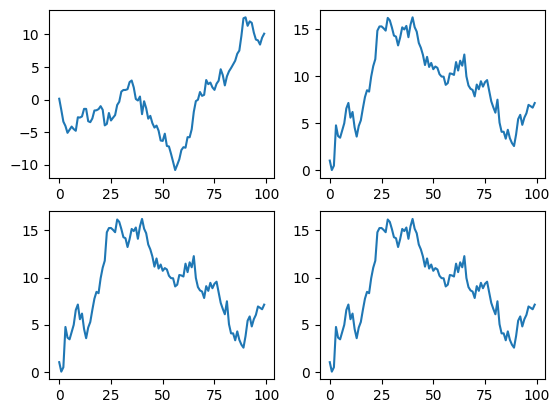

In [13]:
import numpy as np
import matplotlib.pyplot as plt 

series = [np.cumsum(np.random.normal(0, 1, size=100)) for i in range(4)]
fig, axes = plt.subplots(2, 2)

# print(axes.ravel())
# axes = axes.ravel()
# for i, ax in enumerate(axes):
#     ax.plot(series[i])
# plt.show()
print(type(axes[0]))
axes[0][0].plot(series[0])  # row 0 column 0
axes[1][0].plot(series[1])  #  row 1 column 0
axes[0][1].plot(series[1])  #  row 0 column 1
axes[1][1].plot(series[1])  #  row 1 column 1


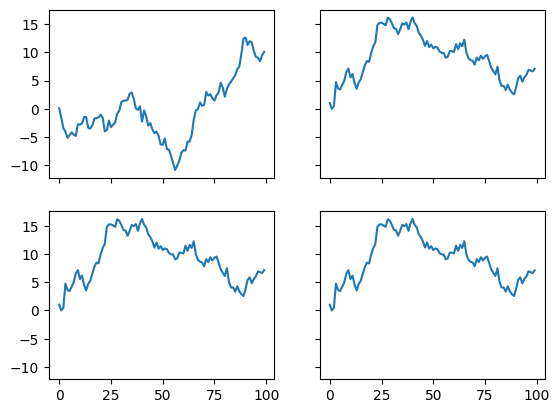

In [14]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
axes[0][0].plot(series[0])  # row 0 column 0
axes[1][0].plot(series[1])  #  row 1 column 0
axes[0][1].plot(series[1])  #  row 0 column 1
axes[1][1].plot(series[1])  #  row 1 column 1

## Tight Layout

The `plt.tight_layout()` adjusts subplot parameters (primarily padding between the Figure edge and the edges of subplots, and padding between the edges of adjacent subplots) so that the subplots fit well in the Figure.

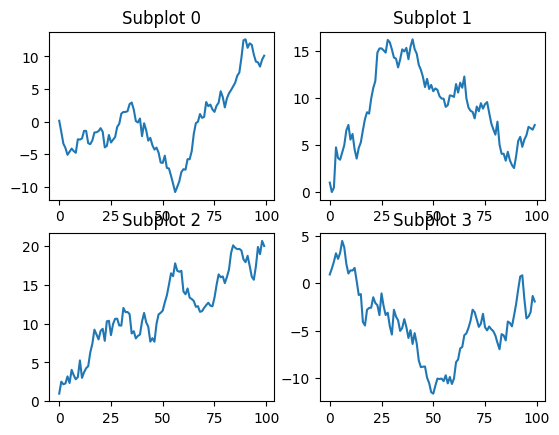

In [16]:
fig, axes = plt.subplots(2, 2)
axes = axes.ravel()
for i, ax in enumerate(axes):
    ax.plot(series[i])
    ax.set_title('Subplot ' + str(i))

Using `plt.tight_layout()` results in no overlapping of the subplots:

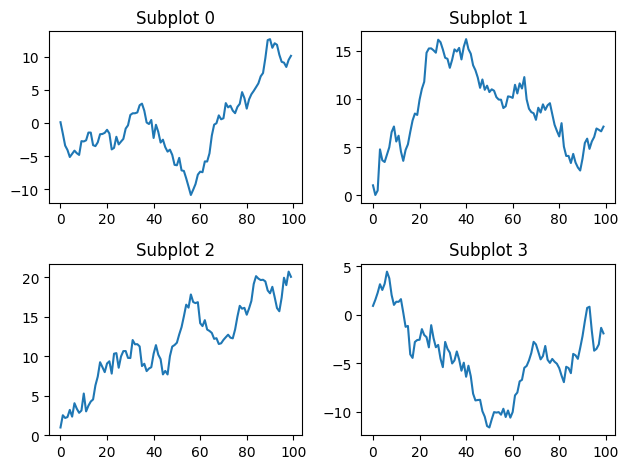

In [17]:
fig, axes = plt.subplots(2, 2)
axes = axes.ravel()
for i, ax in enumerate(axes):
    ax.plot(series[i])
    ax.set_title('Subplot ' + str(i))
plt.tight_layout()

## GridSpec

The `matplotlib.gridspec.GridSpec(nrows, ncols)` function specifies the geometry of the grid in which a subplot will be placed. For example, you can specify a grid with three rows and four columns. As a next step, you have to define which elements of the gridspec are used by a subplot; elements of a gridspec are accessed in the same way as NumPy arrays. You could, for example, only use a single element of a gridspec for a subplot and therefore end up with 12 subplots in total. Another possibility, as shown in the following example, is to create a bigger subplot using 3x3 elements of the gridspec and another three subplots with a single element each.

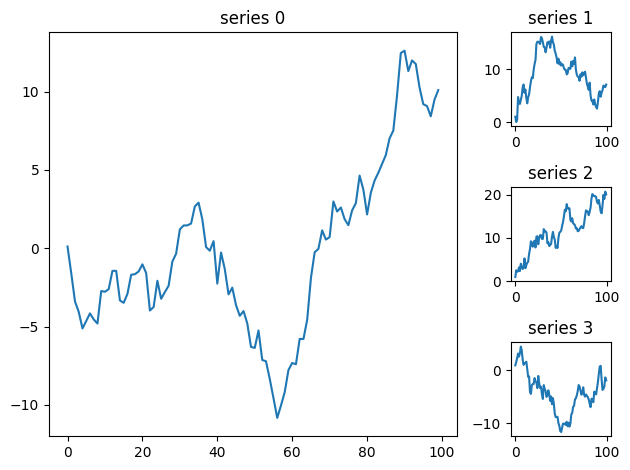

In [24]:
import matplotlib 

gs = matplotlib.gridspec.GridSpec(3, 4)

ax1 = plt.subplot(gs[:3, :3])

ax2 = plt.subplot(gs[0, 3])

ax3 = plt.subplot(gs[1, 3])

ax4 = plt.subplot(gs[2, 3])

ax1.plot(series[0])
ax1.set_title('series 0')

ax2.plot(series[1])
ax2.set_title('series 1')

ax3.plot(series[2])
ax3.set_title('series 2')

ax4.plot(series[3])
ax4.set_title('series 3')

plt.tight_layout()

## Exercise 

In this activity, we will make use of GridSpec to visualize a scatter plot with marginal histograms. Let's look at the following scenario: you are given a dataset containing information about various animals. Visualize the correlation between the various animal attributes using scatter plots and marginal histograms.

The following are the steps to perform:

1. Import the necessary modules and enable plotting within a Jupyter Notebook.
2. Filter the data so that you end up with samples containing a body mass and maximum longevity as the given dataset, AnAge, which was used in the previous exercise, is not complete. Select all of the samples of the Aves class with a body mass of less than 20,000.
3. Create a Figure with a constrained layout. Create a gridspec of size 4x4. Create a scatter plot of size 3x3 and marginal histograms of size 1x3 and 3x1. Add labels and a Figure title.

After executing the preceding steps, the expected output should be as follows:


<img src="images/gridspec_exercise.png" width="60%"/>

In [34]:
df = df[df[mass] < 20000.00]

In [37]:
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt 


data = pd.read_csv('datasets/anage_data.csv', index_col=0)
data.head(10)
longevity = 'Maximum longevity (yrs)'
mass = 'Body mass (g)'
df = data.dropna(subset = [longevity, mass]) 
print(len(df))

df = df[ (df['Class']=='Aves') & (df[mass] < 20000.00)]

546


In [38]:
len(df)

166

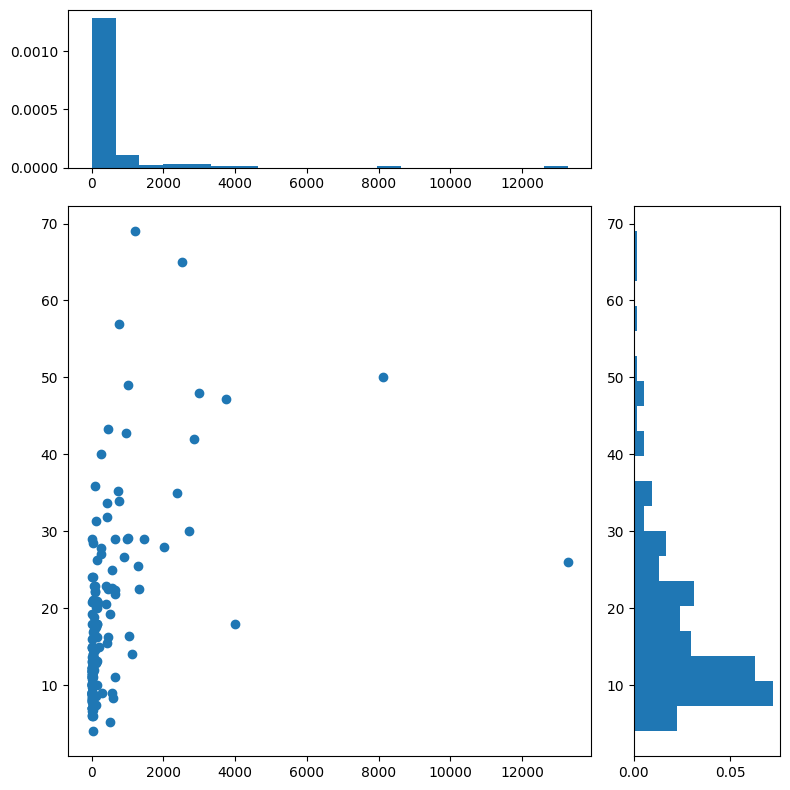

In [63]:
fig = plt.figure(figsize=(8, 8))

gs = matplotlib.gridspec.GridSpec(4, 4)

ax1 = plt.subplot(gs[1:4, 0:3])
ax2 = plt.subplot(gs[0, 0:3], sharex=ax1)
ax3 = plt.subplot(gs[1:4, 3], sharey=ax1)
ax1.scatter(df[mass], df[longevity])
ax2.hist(df[mass], bins=20, density=True)
ax3.hist(df[longevity], bins=20, density=True, orientation='horizontal')
plt.tight_layout()
plt.show()

C:\Users\markk\AppData\Local\Temp\ipykernel_14700\3093628790.py:13: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.tight_layout()


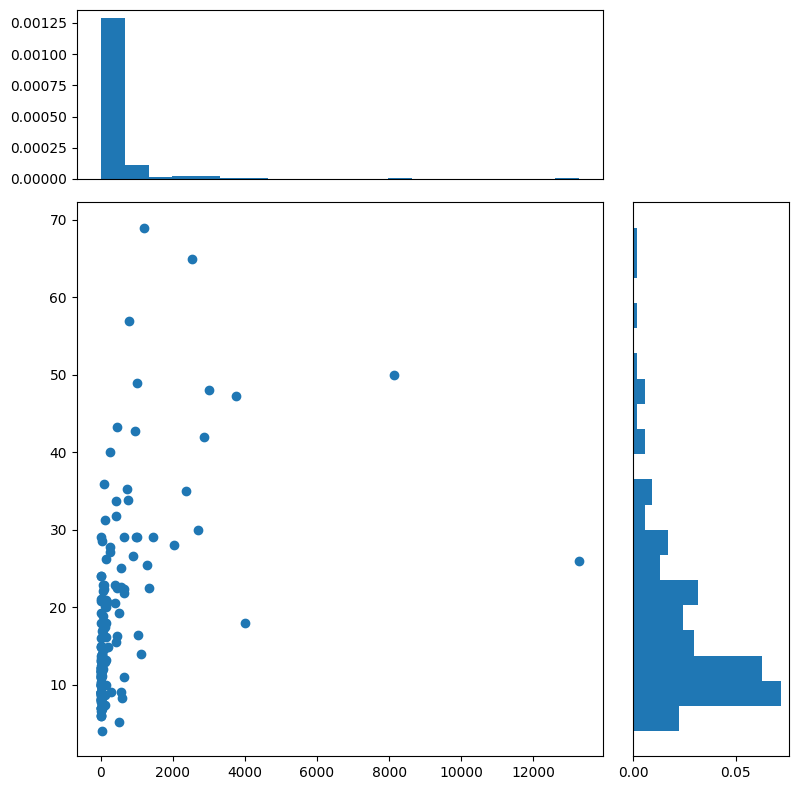

In [69]:
fig = plt.figure(figsize=(8, 8), constrained_layout=True)

gs = matplotlib.gridspec.GridSpec(4, 4)

ax1 = plt.subplot(gs[1:4, 0:3])
ax2 = plt.subplot(gs[0, 0:3])
ax3 = plt.subplot(gs[1:4, 3])
ax1.scatter(df[mass], df[longevity])
ax2.hist(df[mass], bins=20, density=True)
ax2.set_xticks([])
ax3.hist(df[longevity], bins=20, density=True, orientation='horizontal')
ax3.set_yticks([])
plt.tight_layout()
plt.show()

166


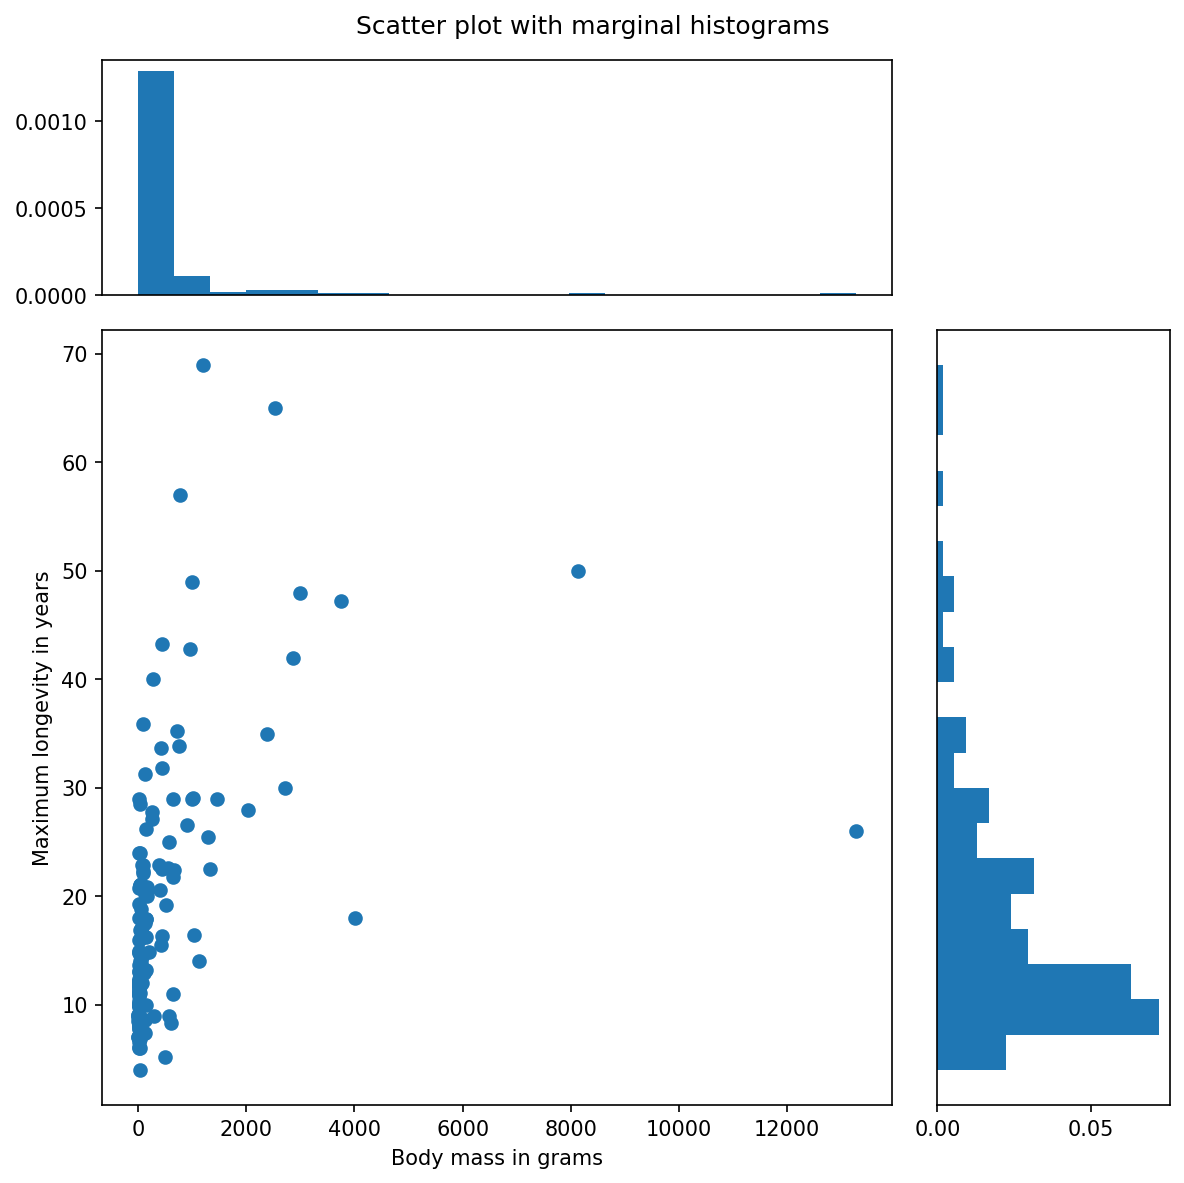

In [70]:
# Preprocessing
longevity = 'Maximum longevity (yrs)'
mass = 'Body mass (g)'
data = data[np.isfinite(data[longevity]) & np.isfinite(data[mass])]
# Sort according to class
aves = data[data['Class'] == 'Aves']
aves = aves[aves[mass] < 20000]
print(len(aves))
# Create figure
fig = plt.figure(figsize=(8, 8), dpi=150, tight_layout=True)
# Create gridspec
gs = fig.add_gridspec(4, 4)
# Specify subplots
histx_ax = fig.add_subplot(gs[0, :-1])
histy_ax = fig.add_subplot(gs[1:, -1])
scatter_ax = fig.add_subplot(gs[1:, :-1])
# Create plots
scatter_ax.scatter(aves[mass], aves[longevity])
histx_ax.hist(aves[mass], bins=20, density=True)
histx_ax.set_xticks([])
histy_ax.hist(aves[longevity], bins=20, density=True, orientation='horizontal')
histy_ax.set_yticks([])
# Add labels and title
plt.xlabel('Body mass in grams')
plt.ylabel('Maximum longevity in years')
fig.suptitle('Scatter plot with marginal histograms')
# Show plot
plt.show()